In [17]:
from backtesting_engine import BacktestEngine
from Bardata import BarData
import sys
from typing import List
from collections import defaultdict, deque
from queue import Queue
import os
import csv


In [24]:
class sample_strategy(BacktestEngine):
    def __init__(self, config):
        super().__init__(config)
        self.closepx = {}
        self.ticks = {}
        self.weights = self.config['weights']['NIFTY']
        self.divisor = None
        self.index_value = 0
        self.historical_data = defaultdict(lambda: deque(maxlen=30))
        self.vwap_index_value = None
        self.current_time = None

    def update_bars(self, new_bars: List[BarData]):
        print(f"Updating {new_bars[0].date} bars")
        self.current_time = new_bars[0].date

        for b in new_bars:
            # print(f"Updating bar: {b.date} for instrument {self.trading_symbols[b.instrument_token]}")
            if self.weights[b.instrument_token] ==0:
                self.index_value = b.close
            self.closepx[b.instrument_token] = b.close
            self.historical_data[b.instrument_token].append((b.date, b.close, b.volume))
        
        self.calculate_divisor()
        self.calculate_vwap()
        print(f"VWAP: {self.vwap_index_value}")
        self.save_vwap()

    def calculate_divisor(self):
        index = sum(self.weights[token]*self.closepx[token] for token in self.data_tokens)
        # for token in self.data_tokens:
        #     index+= self.closepx[token] * self.weights[token]
        
        self.divisor = index/self.closepx[256265]
        return
    
    def calculate_vwap(self):
        vwap = 0
        for token in self.data_tokens:

            if self.weights[token] == 0:
                continue

            data = [(date, close, volume) for date, close, volume in self.historical_data[token]]
            vp = 0
            vol = 0
            for date, close, volume in data:
                vp += close * volume
                vol += volume
            vwap += (vp/vol)*self.weights[token]
        if self.divisor is not None:
            self.vwap_index_value = vwap/self.divisor
        return

    def save_vwap(self):
        file_exists = os.path.exists('vwap.csv')

        with open('vwap.csv','a') as file:
            writer = csv.writer(file)
            writer.writerow([self.current_time,self.vwap_index_value])
        # with open('vwap.csv', 'w') as file:
        #     if not file_exists:
        #         file.write('timestamp,vwap')
        #     file.write(f"{self.current_time},{self.vwap_index_value}\n")
    
    def check_all_conditions(self):
        # print("Checking all conditions")
        # Here you would implement your logic to check conditions
        # For example, checking if a certain condition is met to place an order
        # This is just a placeholder for demonstration purposes


        pass

In [25]:
weights = {'NIFTY':{6401: 0.57,
 3861249: 0.82,
 40193: 0.63,
 60417: 1.0,
 1510401: 2.96,
 4267265: 0.82,
 81153: 2.2,
 4268801: 1.03,
 98049: 1.01,
 1304833: 1.32,
 2714625: 4.37,
 4644609: 0.7,
 177665: 0.76,
 5215745: 0.85,
 225537: 0.66,
 232961: 0.69,
 315393: 0.94,
 1850625: 1.59,
 341249: 13.07,
 119553: 0.69,
 345089: 0.45,
 348929: 0.93,
 356865: 1.88,
 1270529: 8.95,
 424961: 3.59,
 1346049: 0.4,
 408065: 5.31,
 3001089: 0.95,
 492033: 3.0,
 2939649: 3.85,
 519937: 2.22,
 2815745: 1.42,
 2977281: 1.59,
 4598529: 0.76,
 633601: 0.9,
 3834113: 1.24,
 738561: 8.12,
 5582849: 0.65,
 1102337: 0.86,
 779521: 2.79,
 857857: 1.76,
 2953217: 3.46,
 878593: 0.61,
 884737: 1.32,
 895745: 1.2,
 3465729: 0.85,
 897537: 1.19,
 502785: 1.11,
 2952193: 1.26,
 969473: 0.7,
 256265: 0}}

config = {
    "strategy_name" : "VWAP_calculation",
    "start_date" : "2025-05-29",
    "end_date" : "2025-05-29",
    'exchange': 'NFO',
    'weights': weights,
    'interval': 'minute',
    'tokens': list(weights['NIFTY'].keys())
}

vwap = sample_strategy(config)
vwap.run()

No trading symbols provided for NFO tokens.
No trading symbols provided for NSE tokens.
No trading symbols provided for BSE tokens.
No trading symbols provided for BFO tokens.
Updating 2025-05-29 09:15:00+05:30 bars
VWAP: 24884.500000000007
Updating 2025-05-29 09:16:00+05:30 bars
VWAP: 24886.281338746685
Updating 2025-05-29 09:17:00+05:30 bars
VWAP: 24876.122769066147
Updating 2025-05-29 09:18:00+05:30 bars
VWAP: 24876.836642291724
Updating 2025-05-29 09:19:00+05:30 bars
VWAP: 24869.58391038192
Updating 2025-05-29 09:20:00+05:30 bars
VWAP: 24870.617160343983
Updating 2025-05-29 09:21:00+05:30 bars
VWAP: 24869.20665862073
Updating 2025-05-29 09:22:00+05:30 bars
VWAP: 24867.15010901694
Updating 2025-05-29 09:23:00+05:30 bars
VWAP: 24864.59168775257
Updating 2025-05-29 09:24:00+05:30 bars
VWAP: 24859.547245025606
Updating 2025-05-29 09:25:00+05:30 bars
VWAP: 24861.68440516893
Updating 2025-05-29 09:26:00+05:30 bars
VWAP: 24857.626074210428
Updating 2025-05-29 09:27:00+05:30 bars
VWAP: 248

{'sharpe_ratio': None, 'max_drawdown': None}

In [26]:
import pandas as pd
vp=pd.read_csv('/Users/sushrutkagde/Documents/Project_X/backtesting_framework/vwap.csv')
vp

,2025-05-29 09:15:00+05:30,24884.500000000007
0,2025-05-29 09:16:00+05:30,24886.281339
1,2025-05-29 09:17:00+05:30,24876.122769
2,2025-05-29 09:18:00+05:30,24876.836642
3,2025-05-29 09:19:00+05:30,24869.583910
4,2025-05-29 09:20:00+05:30,24870.617160
...,...,...
369,2025-05-29 15:25:00+05:30,24829.133057
370,2025-05-29 15:26:00+05:30,24834.689312
371,2025-05-29 15:27:00+05:30,24835.113149
372,2025-05-29 15:28:00+05:30,24836.883972


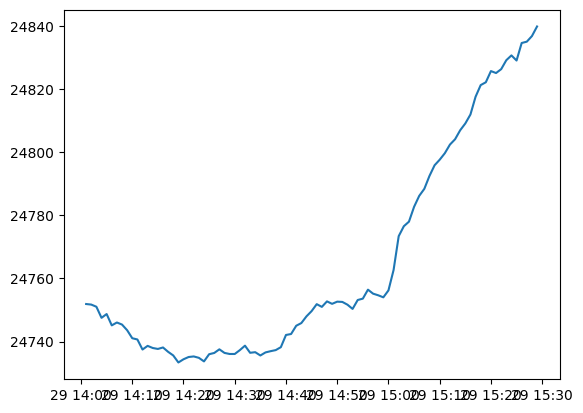

In [31]:
# vp['24884.500000000007'].plot()
from matplotlib import pyplot as plt
vwap_new = vp[285:375]
# plt.figure(figsize=(20, 9))
plt.plot(pd.to_datetime(vwap_new['2025-05-29 09:15:00+05:30']),vwap_new['24884.500000000007'])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (89,) and (12539,)

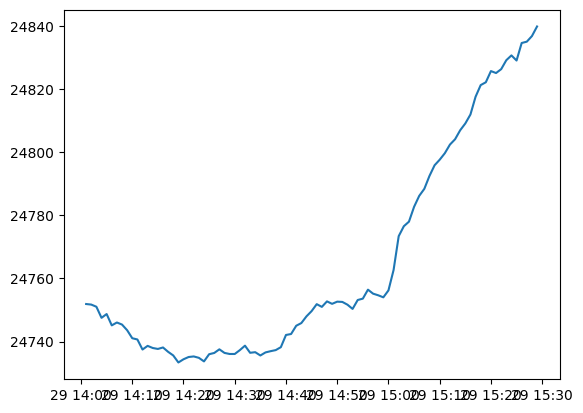

In [38]:
syn_price = pd.read_csv('/Users/sushrutkagde/Documents/Project_X/options_data/2025-05-29/NIFTY25MAY24800CE2025-05-29.csv')
# plt.figure(figsize=(20, 9))
plt.plot(pd.to_datetime(vwap_new['2025-05-29 09:15:00+05:30']),vwap_new['24884.500000000007'])
plt.plot(pd.to_datetime(vwap_new['2025-05-29 09:15:00+05:30']),syn_price['synthetic_future'].rolling(180).mean())
plt.show()

In [42]:
vwap_new['2025-05-29 09:15:00+05:30'] = pd.to_datetime(vwap_new['2025-05-29 09:15:00+05:30']).dt.tz_localize(None)
syn_price['exchange_timestamp'] = pd.to_datetime(syn_price['exchange_timestamp'])

# Round tick-wise timestamps down to the nearest minute
syn_price['minute_timestamp'] = syn_price['exchange_timestamp'].dt.floor('T')  # 'T' is minute

# Merge tick data with minute data on minute timestamp
df_merged = pd.merge(syn_price, vwap_new, left_on='minute_timestamp', right_on='2025-05-29 09:15:00+05:30', suffixes=('_tick', '_minute'))

# Optional: drop the extra 'minute_timestamp' and duplicate timestamp columns if needed
df_merged.drop(columns=['minute_timestamp'], inplace=True)

print(df_merged.head())

   tradable  mode  instrument_token  last_price  last_traded_quantity  \
0      True  full          15801602       15.20                   300   
1      True  full          15801602       15.30                    75   
2      True  full          15801602       15.20                    75   
3      True  full          15801602       14.85                    75   
4      True  full          15801602       14.95                   150   

   average_traded_price  volume_traded  total_buy_quantity  \
0                 36.65      716143500            45603450   
1                 36.65      716143500            45603450   
2                 36.65      716143500            45603450   
3                 36.65      716251500            45557775   
4                 36.65      716259900            45560325   

   total_sell_quantity                                               ohlc  \
0              6883575  {'open': 105.0, 'high': 148.5, 'low': 11.05, '...   
1              6883575  {'open': 1

/var/folders/cn/tfff3ckj5rgbdz6t7kthy19m0000gn/T/ipykernel_31662/549894692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vwap_new['2025-05-29 09:15:00+05:30'] = pd.to_datetime(vwap_new['2025-05-29 09:15:00+05:30']).dt.tz_localize(None)
/var/folders/cn/tfff3ckj5rgbdz6t7kthy19m0000gn/T/ipykernel_31662/549894692.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  syn_price['minute_timestamp'] = syn_price['exchange_timestamp'].dt.floor('T')  # 'T' is minute


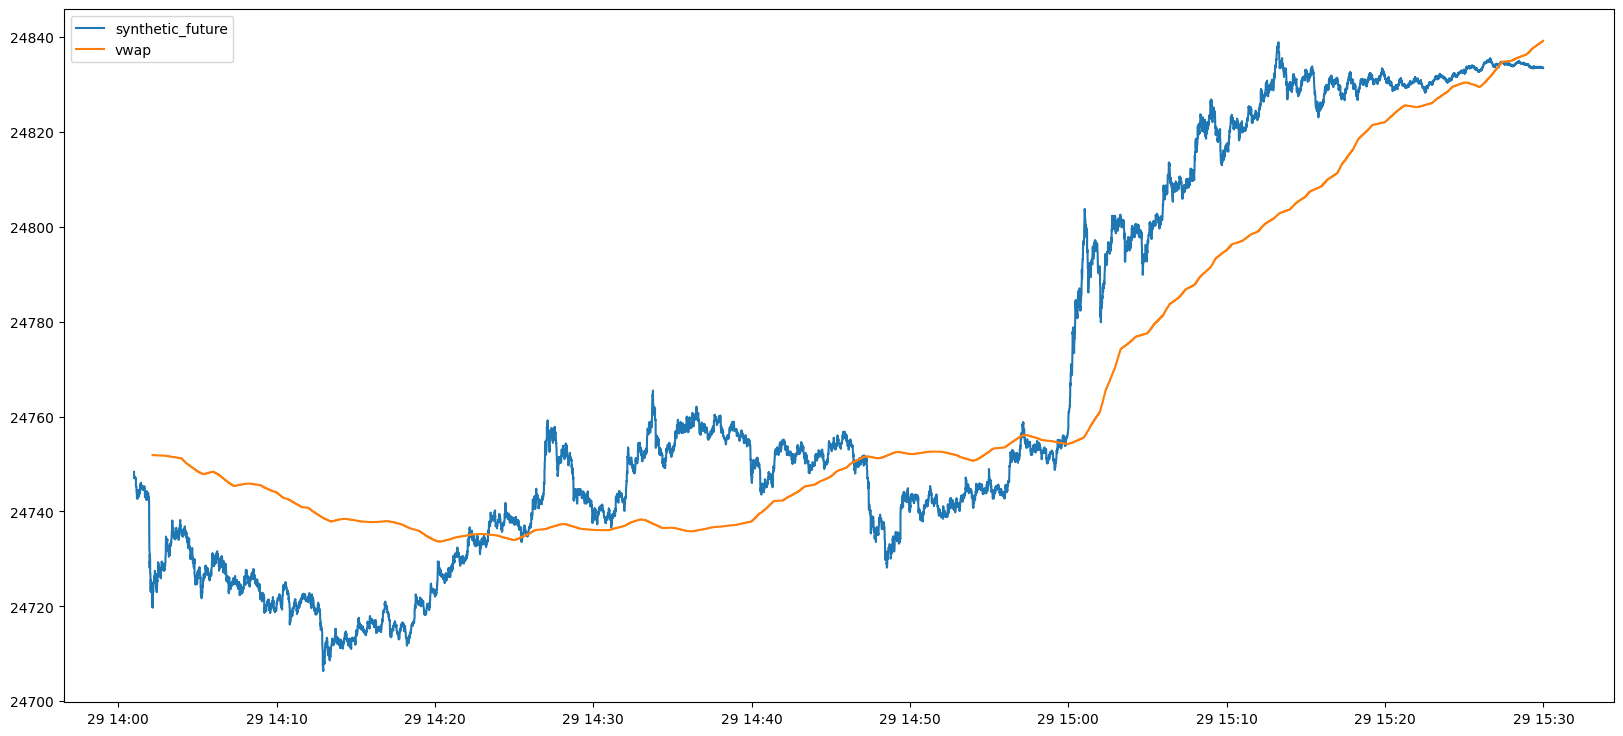

In [46]:
plt.figure(figsize=(20, 9))
plt.plot(df_merged['exchange_timestamp'],df_merged['synthetic_future'],label='synthetic_future')
plt.plot(df_merged['exchange_timestamp'],df_merged['24884.500000000007'].rolling(180).mean(),label='vwap')
plt.legend()
plt.show()

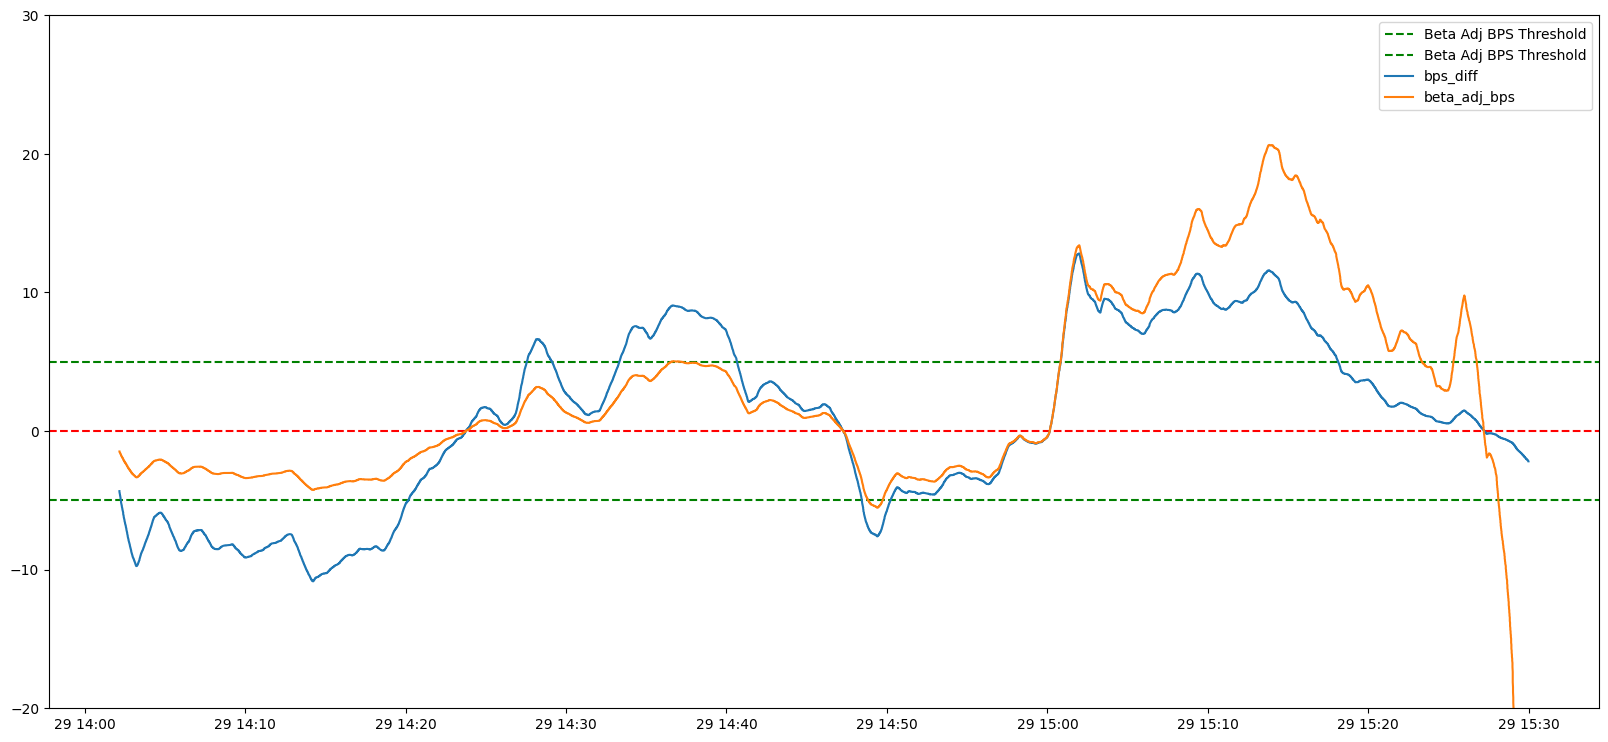

In [65]:
df_merged['bps_diff'] = (df_merged['synthetic_future'] - df_merged['24884.500000000007'])/df_merged['synthetic_future'] * 10000
df_merged['beta_adj_bps'] = df_merged['bps_diff']/((pd.to_datetime('2025-05-29 15:30:00')-df_merged['exchange_timestamp']).dt.total_seconds()/1800)
plt.figure(figsize=(20, 9))

# plt.axhline(y=1, color='red', linestyle='--', label='BPS Threshold')
plt.axhline(y=5, color='green', linestyle='--', label='Beta Adj BPS Threshold')
plt.axhline(y=0, color='red', linestyle='--')
# plt.axhline(y=-1, color='red', linestyle='--', label='BPS Threshold')
plt.axhline(y=-5, color='green', linestyle='--', label='Beta Adj BPS Threshold')
plt.plot(df_merged['exchange_timestamp'],df_merged['bps_diff'].rolling(180).mean(),label='bps_diff')
plt.plot(df_merged['exchange_timestamp'],df_merged['beta_adj_bps'].rolling(180).mean(),label='beta_adj_bps')
plt.ylim(-20,30)
plt.legend()
plt.show()

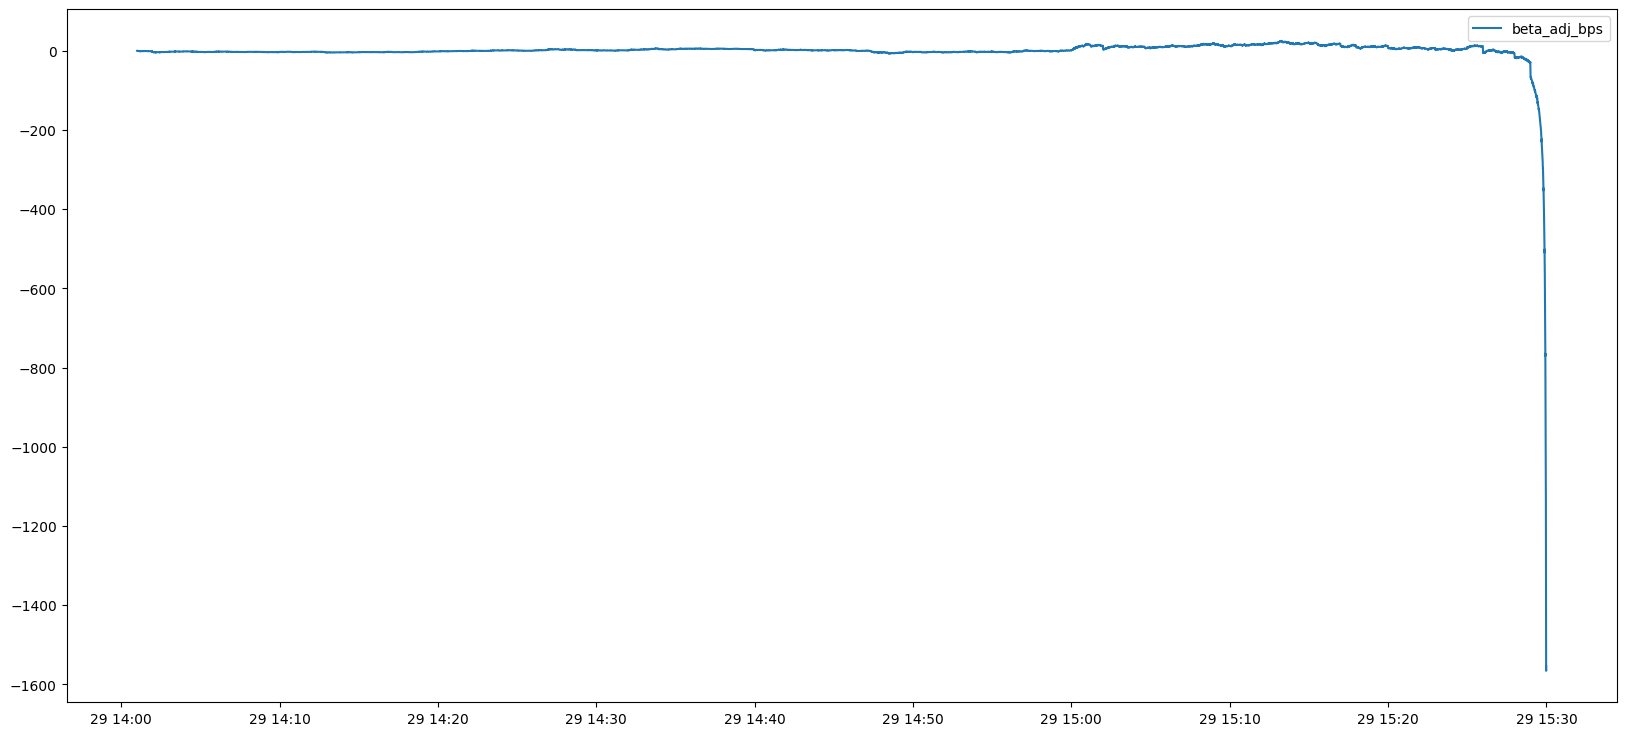

In [52]:

df_merged['beta_adj_bps'] = df_merged['bps_diff']/((pd.to_datetime('2025-05-29 15:30:02')-df_merged['exchange_timestamp']).dt.total_seconds()/1800)

plt.figure(figsize=(20, 9))
plt.plot(df_merged['exchange_timestamp'],df_merged['beta_adj_bps'],label='beta_adj_bps')
plt.legend()
plt.show()